In [2]:
# Usual suspect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys 
sys.path.insert(1, '../muograph/')
from torch import Tensor
from functools import partial


from typing import List, Union, Tuple
from volume.Volume_Interest import VolumeInterest
from analysis.absorption_analysis import AbsorptionAnalysis
from detector.pixel_detector import PixelDetector
import pickle

import os


# import os
# file = "/home/geant/Desktop/MST_framework/Muograph/analysis/absorption/8Scale_statue_5M_gen_event_0to800_MeV/1-3-2016_50kevents_rec_hits_2of5"
# with open(file,"rb") as f:
#     rec_hits = pickle.load(f)
    
# print(rec_hits.size())


In [3]:
from functools import partial

partial_det = partial(PixelDetector, 
              xy_min_max=(-1000.,1000.,-1000.,1000.),
              pixel_width=19.9,
              gap=0.01)
input_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption.csv'
input_directory = "../data/Wooden_statue_copper_cylinder_160cm/"

analysis = AbsorptionAnalysis(CRY_date="1-3-2016",
                              n_gen_event=5,
                              out_filename_title="8Scale_statue",
                              filename=input_filename, 
                              directory=input_directory,
                              partial_detector=partial_det,
                              energy_cut=[0,800])


Overwrite /home/geant/Desktop/MST_framework/Muograph/analysis/absorption/8Scale_statue_5M_gen_event_0to800_MeV/ ? [y,n]y

Input data file = MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption.csv 
Input directory = ../data/Wooden_statue_copper_cylinder_160cm/

# event = 1145314

# event = 238915 within energy range [0,800] MeV/c2

Pixel generation


DONE

 Pixel triggering


rec_hits filename =  1-3-2016_50kevents_rec_hits_1of5

Pixel generation


DONE

 Pixel triggering


rec_hits filename =  1-3-2016_50kevents_rec_hits_2of5

Pixel generation


DONE

 Pixel triggering


rec_hits filename =  1-3-2016_50kevents_rec_hits_3of5

Pixel generation


DONE

 Pixel triggering


rec_hits filename =  1-3-2016_50kevents_rec_hits_4of5

Pixel generation


DONE

 Pixel triggering


rec_hits filename =  1-3-2016_50kevents_rec_hits_5of5


In [2]:
def apply_energy_cut(hits:Tensor,E:Tensor,energy_cuts:List[int]=None) -> Tuple[Tensor]:
    r"""
    Apply cut on data file based on the generated muon energy.
    
    INPUTS:
     - hits:Tensor with size (3,n_plane,n_event)
     - E:Tensor with size (n_event), muon's energy in MeV
     - energy_cuts:List[float] The lower and upper cut on energy [Emin,Emax]
    """
    if(energy_cuts is None):
        energy_cuts = [torch.min(E),torch.max(E)]
        
    mask = (E>=energy_cuts[0])&(E<=energy_cuts[1])
    return hits[:,:,mask],E[mask]

def divide_data_file(hits:Tensor,E:Tensor=None,ev_per_tensor:int=200000) -> Union[List[Tensor],Tuple[List[Tensor]]]:
    
    r"""
    INPUTS:
     - hits:Tensor with size (3,n_plane,n_event)
     - E:Tensor with size (n_event), muon's energy
     - ev_per_tensor:int The number of event used per tensor. Can be adjusted 
     depending on your computed power.
     
    OUTPUT:
     - hit_files,E_files: Tuple[List[Tensor]] if E is not None
     - hit_files, List[Tensor] if E is None
    """
    
    n_event = hits.size()[-1]
    n_file=n_event//ev_per_tensor
    if((n_event%ev_per_tensor)!=0):
        n_file += 1
        
    hit_files,E_files = [],[]
    
    for i in range(n_file):
        hit_files.append(hits[:,:,(i*ev_per_tensor):((i+1)*ev_per_tensor)])
        if(E is not None):
            E_files.append(E[(i*ev_per_tensor):((i+1)*ev_per_tensor)])

    if(E is not None):
        return hit_files,E_files
    else:
        return hit_files
    
def get_rec_hits_filename(ev_per_tensor:int,
                          gen_filename:str,
                          CRY_date:str=None,
                          energy_cuts:List[int]=None) -> str:
    
    cut_label = "{}to{}MeV".format(int(energy_cuts[0]),int(energy_cuts[1]))
    ev_label = "{}kevents".format(int(ev_per_tensor/1000))
    
    if(cut_label is None):
        return gen_filename+"_"+CRY_date+"_"+ev_label+"_"+"rec_hits"
    else:
        return gen_filename+"_"+CRY_date+"_"+ev_label+"_"+cut_label+"_rec_hits"
        

In [3]:
from utils.read_file import hits_csv_to_tensor
filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption.csv'
directory = "../data/Wooden_statue_copper_cylinder_160cm/"
hits,E = hits_csv_to_tensor(filename=filename,directory=directory)
hits,E = apply_energy_cut(hits,E,[0,800])
hits = hits[:,-3:]

hit_files, E_files = divide_data_file(hits=hits,E=E,ev_per_tensor=50000)

In [17]:
import os

#Energy cut
energy_cut = [0,800]
out_filename="8scale_statue"
n_gen_event = 5
out_filename += "_{}M_gen_event".format(n_gen_event)
out_filename += "_{}to{}_MeV".format(energy_cut[0],energy_cut[1]) 

out_directory = os.getcwd().replace("dev","analysis/absorption/"+out_filename+"/")

if(os.path.exists(out_directory)):
    print("Directory already exists!")
    awnser = None
    while((awnser!="n")|(awnser!="y")):
        awnser=input("\nOverwrite {} ? [y,n]".format(out_directory))
        if(awnser=="n"):
            raise Exception("\nAnalysis cancelled, choose another out_filename")
        if(awnser=="y"):
            break
        else:
            print('y = yes, n = no')
else:
    os.makedirs(out_directory)
    print("Create directory {}".format(out_directory))

Directory already exists!

Overwrite /home/geant/Desktop/MST_framework/Muograph/analysis/absorption/8scale_statue_5M_gen_event_0to800_MeV/ ? [y,n]y


In [41]:
foo=input('Please enter a value:')


Please enter a value:16


In [ ]:
try:
    f = open(directory+filename)
except FileNotFoundError:
    print("{} does not exists!".format(directory+filename))
    if
    os.makedirs(directory)
    print("{} created".format(directory+filename))
     
else:
    print("{} already exists!".format(directory+filename))
    print("Overwrite file? [y/n]")
    for line in sys.stdin:
        if line=="y":

In [18]:
directory = "../analysis/absorption/"
filename = "8Scale_statue_bronze"
import os 

try:
    f = open(directory+filename)
except FileNotFoundError:
    print("{} does not exists!".format(directory+filename))
    if
    os.makedirs(directory)
    print("{} created".format(directory+filename))
     
else:
    print("{} already exists!".format(directory+filename))
    print("Overwrite file? [y/n]")
    for line in sys.stdin:
        if line=="y":
            
    #Do stuff
# Python program to explain os.makedirs() method  
      
# importing os module  
    
# Leaf directory 
# directory = "Nikhil"
    
# # Parent Directories 
# parent_dir = "D:/Pycharm projects/GeeksForGeeks/Authors"
    
# # Path 
# path = os.path.join(parent_dir, directory) 
    
# # Create the directory 
# # 'Nikhil' 
# os.makedirs(path) 
# print("Directory '% s' created" % directory) 

{} does not exists!
b'/home/geant/Desktop/MST_framework/Muograph/dev'


'/home/geant/Desktop/MST_framework/Muograph/'

In [6]:
from volume.Volume_Interest import VolumeInterest
from detector.PixelDetector import PixelDetector
import pickle
#File directory
directory = "../data/reconstructed_hits/"

#File size
ev_per_tensor = 50000

#Energy cut
energy_cuts = [0.,800] # in MeV

#Filename composition
CRY_date = '1-3-2016'
gen_filename = 'Satue_8scale_bronze'

for hit_file,E_file,i in zip(hit_files[:2],E_files[:2],range(len(hit_files))):

    det = PixelDetector(hits=hit_file, xy_min_max=(-1000.,1000.,-1000.,1000.),pixel_width=19.9,gap=.01)
    
    filename = get_rec_hits_filename(ev_per_tensor=50000,
                                     gen_filename=gen_filename,
                                     CRY_date=CRY_date,
                                     energy_cuts=[0,800])
    
    filename+="_{}of{}".format(i,len(hit_files))
    print("filename = ", filename)
    
    with open(directory+filename,'wb') as f:
        pickle.dump(det.rec_hits,f)


Pixel generation


DONE

 Pixel triggering


filename =  Satue_8scale_bronze_1-3-2016_50kevents_0to800MeV_rec_hits_0of5

Pixel generation


DONE

 Pixel triggering


filename =  Satue_8scale_bronze_1-3-2016_50kevents_0to800MeV_rec_hits_1of5


In [2]:
from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,1135],dimension=[800,2000,1200],voxel_width=50)

from utils.read_file import hits_csv_to_tensor
filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption.csv'
directory = "../data/Wooden_statue_copper_cylinder_160cm/"
hits,E = hits_csv_to_tensor(filename=filename,directory=directory)

energy_mask = (E>1000)&(E<2000)

hits = hits[:,-5:,energy_mask]

# from detector.PixelDetector import PixelDetector
# det = PixelDetector(hits=hits, xy_min_max = (-1000.,1000.,-1000.,1000.),pixel_width=.9,gap=.01)


# from tracking.Tracking import *
# tracks = Tracking(hits=hits,voi=VOI,analysis='absorption',E=E)

# import pickle
# tracks_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_traks_1_to_2_GeV'
# with open(directory+tracks_filename,'wb') as f:
#     pickle.dump(tracks,f)

In [2]:
import pickle
tracks_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_traks_1_to_2_GeV'
directory = "../data/Wooden_statue_copper_cylinder_160cm/"
with open(directory+tracks_filename,'rb') as f:
    tracks = pickle.load(f)

from reconstruction.absorption import AbsorbtionReconstruction
transmition = AbsorbtionReconstruction(tracks=tracks)


Sub-volumes


DONE

Voxel triggering


DONE


assigning voxel's score


computing final voxel's score


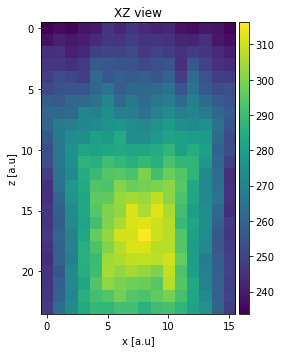

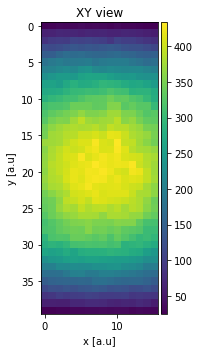

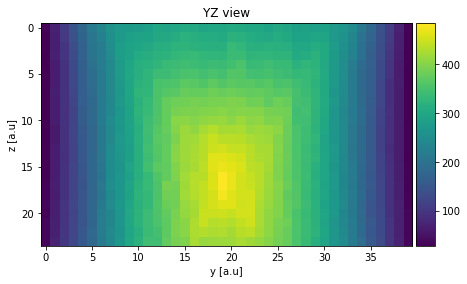

In [3]:
def sum_list(vox_list:List) -> int:
    """
    Return the sum of the input list
    """
    return np.sum(np.array(vox_list))

score_list = transmition.generate_score_list()
score_list,n_true = transmition.assign_score_voxel(score_list=score_list,
                                                   score_feature=torch.ones_like(tracks.events),
                                                   masks = None)

final_scores = transmition.compute_final_voxel_score(score_list=score_list,
                                             score_method=sum_list,
                                             quartile=None)

from plotting.Plotting import plot_VOI_pred
plot_VOI_pred(preds=final_scores)

import pickle
# scores_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_sub_GEV_scores'
scores_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_traks_1_to_2_GeV_scores'

with open(directory+scores_filename,'wb') as f:
    pickle.dump(final_scores,f)

In [3]:
from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,1135],dimension=[800,2000,1200],voxel_width=50)

from utils.read_file import hits_csv_to_tensor
filename = 'MuoscopeFreeSky_Scale8_1-4-2016_5M_Absorption.csv'
directory = "../data/Wooden_statue_copper_cylinder_160cm/"
hits,E = hits_csv_to_tensor(filename=filename,directory=directory)

energy_mask = (E>1000)&(E<2000)
# energy_mask = (E<800)


hits = hits[:,-5:,energy_mask]
print(hits.size())


from tracking.Tracking import *
tracks = Tracking(hits=hits,voi=VOI,analysis='absorption',E=E)

import pickle
tracks_filename = 'MuoscopeStatue_8Scale_1-4-2016_5M_Bronze_Absorption_traks_1_to_2_free_sky'
with open(directory+tracks_filename,'wb') as f:
    pickle.dump(tracks,f)

torch.Size([3, 5, 245505])

Tracking in progress


Tracking done


In [4]:
import pickle
# tracks_filename = 'MuoscopeStatue_8Scale_1-4-2016_5M_Bronze_Absorption_traks_sub_GEV_free_sky'
tracks_filename = 'MuoscopeStatue_8Scale_1-4-2016_5M_Bronze_Absorption_traks_1_to_2_free_sky'

directory = "../data/Wooden_statue_copper_cylinder_160cm/"
with open(directory+tracks_filename,'rb') as f:
    tracks = pickle.load(f)

from reconstruction.absorption import AbsorbtionReconstruction
transmition = AbsorbtionReconstruction(tracks=tracks)


Sub-volumes


DONE

Voxel triggering


DONE


assigning voxel's score


computing final voxel's score


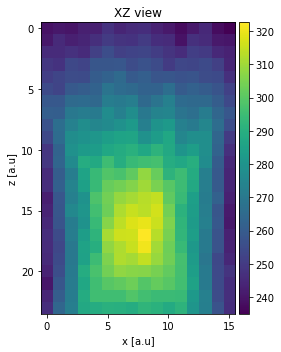

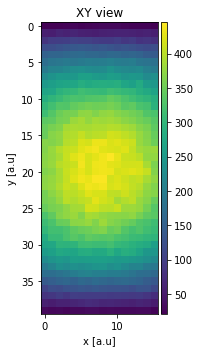

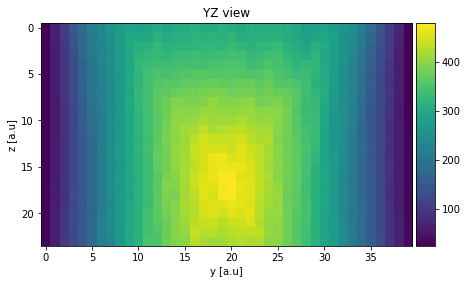

In [6]:
def sum_list(vox_list:List) -> int:
    """
    Return the sum of the input list
    """
    return np.sum(np.array(vox_list))

# Create an empty list for each voxel
score_list = transmition.generate_score_list()

# Define mask to filter events
masks = None

# Assign score if the event respects the conditions in mask
score_list,n_true = transmition.assign_score_voxel(score_list=score_list,
                                                   score_feature=torch.ones_like(tracks.events),
                                                   masks = masks)

# Compute final voxel scores using the desired function
final_scores_free_sky = transmition.compute_final_voxel_score(score_list=score_list,
                                             score_method=sum_list,
                                             quartile=None)
from plotting.Plotting import plot_VOI_pred
plot_VOI_pred(preds=final_scores_free_sky)

import pickle
# scores_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_sub_GEV_free_sky_scores'
scores_filename = 'MuoscopeStatue_8Scale_1-4-2016_5M_Bronze_Absorption_scores_1_to_2_free_sky'

with open(directory+scores_filename,'wb') as f:
    pickle.dump(final_scores_free_sky,f)

# Reconstruction


In [5]:
#VOI
from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,1135],dimension=[800,2000,1200],voxel_width=50)

# Transmition
import pickle
scores_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_sub_GEV_scores'
# scores_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_traks_1_to_2_GeV_scores'

directory = "../data/Wooden_statue_copper_cylinder_160cm/"
with open(directory+scores_filename,'rb') as f:
    transmission = pickle.load(f)

# Free-sky
import pickle
scores_filename = 'MuoscopeStatue_8Scale_1-3-2016_5M_Bronze_Absorption_sub_GEV_free_sky_scores'
# scores_filename = 'MuoscopeStatue_8Scale_1-4-2016_5M_Bronze_Absorption_scores_1_to_2_free_sky'

directory = "../data/Wooden_statue_copper_cylinder_160cm/"
with open(directory+scores_filename,'rb') as f:
    free_sky = pickle.load(f)

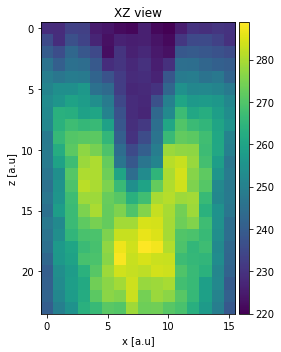

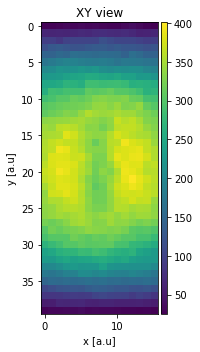

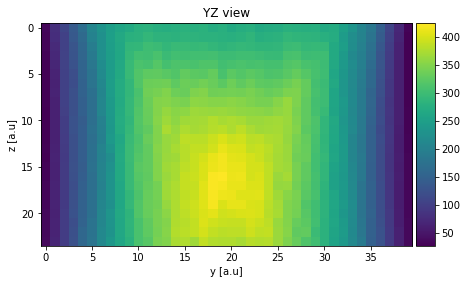

In [6]:
from plotting.Plotting import plot_VOI_pred
plot_VOI_pred(preds=transmission)

## Muon hit density

In photography, luminosity (a.k.a the number of photon collected) drives the quality of the reconstructed image. It is impossible to take a picture of a car detecting only 1000 photons. We need every part of the car to interact with the detected photons in order to extract information from them.

Applying the same reasonning to muography, we could define a "lumuosity" which would define how exposed to muons the volume is. **Example**:

- $1$ million muons and $1\text{m}^3$ statue -> good lumuosity! (1 $\mu/\text{cm}^3$) 
- $1$ k muons and $10\text{m}^3$ statue -> no lumuosity! (0.001 $\mu/\text{cm}^3$)

The **backprojection-ASR** algorithm **counts** the number of **hit voxel per event**, given a muon **track** and a **voxelized volume** of interest: e.g a reconstructed track going throught 10 different voxel will trigger all of them. Thus, this muon generates a total of 10 voxel hits (1 per voxel).

Once we run the backprojection algorithm, we can compute the density of muon hit per voxel (a.k.a how many times voxels have been hit by a muon). This distribution can be used as a proxy for "lumuosity".

**Example**:

- **Average # muon hit per voxel**: 256
- **Total # muon hit per volume**: 2.05

These figure of merit must be implemented in a new analysis class! which would take as input both transmission and free sky backprojection-ASR results.


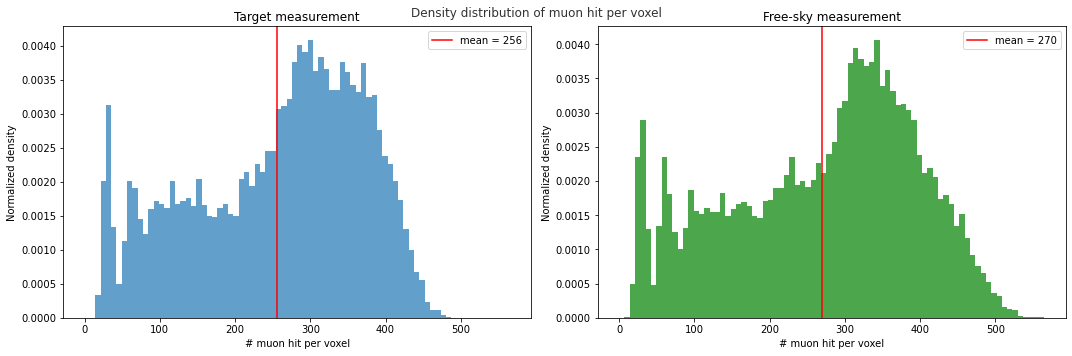

VOI volume = 1920000.0 cm3, 1.92 m3
Total number of hit voxels = 4150964 for free sky, 3942230 for target
Number of hit per cm3 = 2.05
Number of hit per voxel (target measurement)= 256.66
Number of hit per voxel (free sky measurement)= 270.25


In [3]:
from plotting.Plotting import plot_lumuosity_summary
plot_lumuosity_summary(transmission,free_sky,VOI)

## Transmission - absorbtion power

We can have a look at the absorbtion power, a.k.a how many muons have been absorbed? Based on We can compute 3 things:

 - Ratio: Simply the ratio between measured and free-sky flux. (It is used in MURAVES, and most tramsition based muography experiments).
 
 - Diff: The difference between measured and free-sky flux. It should be bad because muon flux has a theta dependance!!
 
 - Diff-Ratio: The difference between measured and free-sky flux, divided by free sky.
 
### Ratio

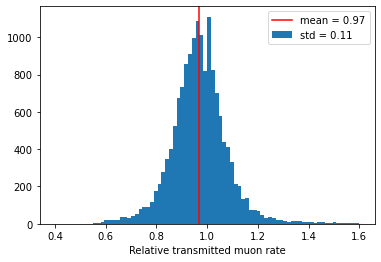

In [4]:
ratio = transmission/free_sky

mean = ratio.ravel().mean()
std = ratio.ravel().std()

fig,ax =plt.subplots()
ax.hist(ratio.ravel(),bins=80,range=(0.4,1.6),label='std = {:.2f}'.format(std))
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Relative transmitted muon rate")
ax.legend()
plt.show()

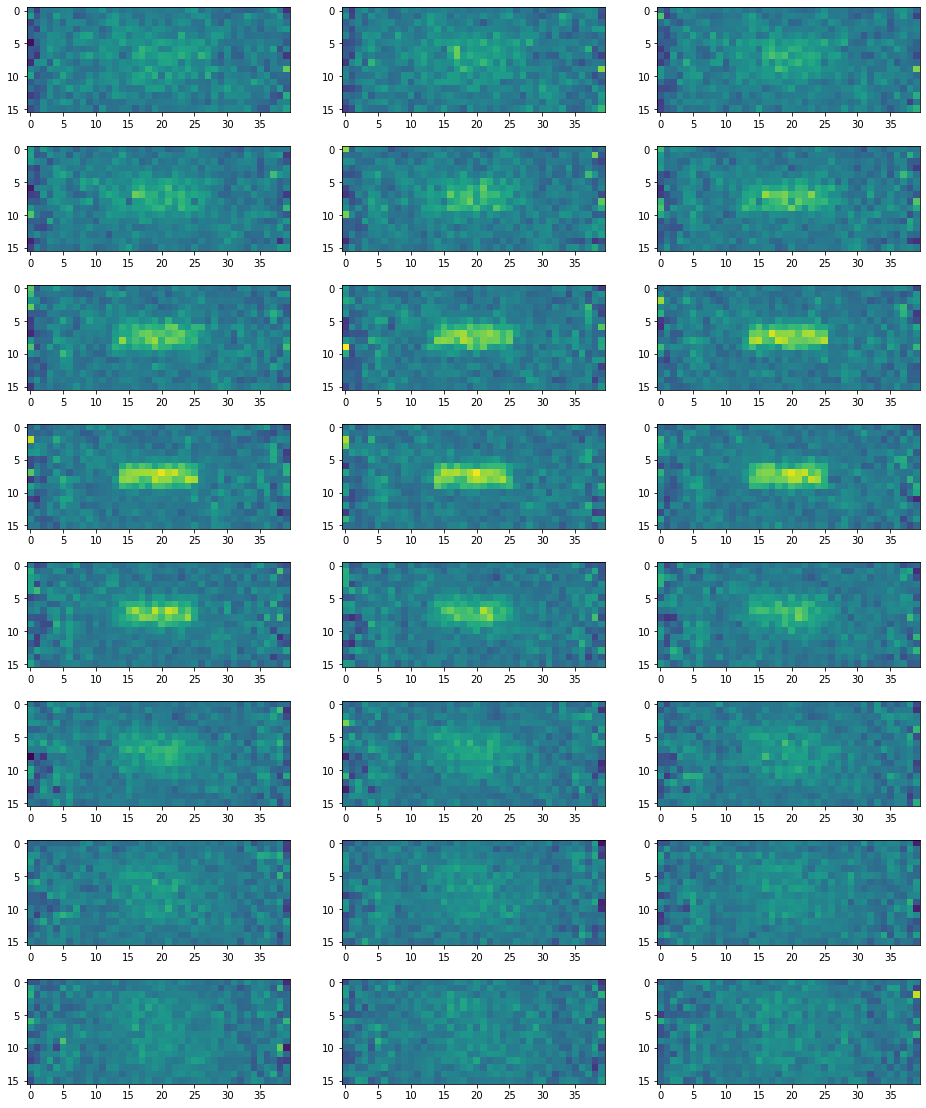

In [5]:
# def plot_transmission_score_slices(transmission:Tensor) -> None:
    
#     r"""
#     Plot the transmission score of a voxelized VOI.
    
#     INPUT:
#      - VOI:VolumeInterest The voxelized volume of interest used for tracking and reconstruction.
#      - transmission: Tensor with size (n_vox_x,n_vox_y,n_vox_z) containing the scores of the reconstruction.
     
#     NOTE: this function requires the imshow_transmission_rate method.
#     """
    
#     fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(16,20))
#     ax = ax.ravel()
#     for i in range(len(ratio[0,0,:])):
#         imshow_transmission_rate(1/ratio[:,:],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)    

from plotting.Plotting import plot_transmission_score_slices
plot_transmission_score_slices(transmission=ratio,VOI=VOI)

## Diff

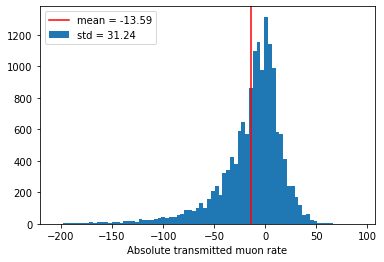

In [29]:
diff = transmission-free_sky

mean = diff.ravel().mean()
std = diff.ravel().std()

fig,ax =plt.subplots()
ax.hist(diff.ravel(),bins=80,label='std = {:.2f}'.format(std))
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Absolute transmitted muon rate")
ax.legend()
plt.show()

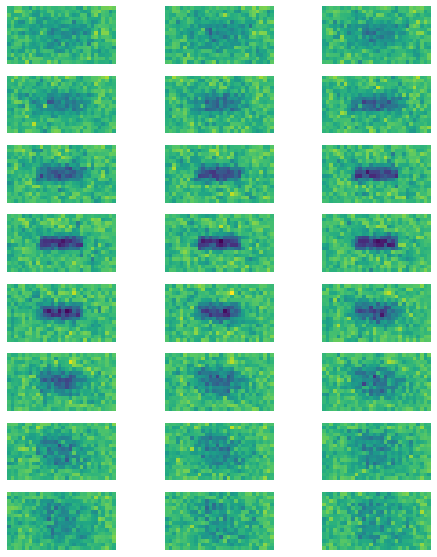

In [31]:
fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(8,10))
ax = ax.ravel()
for i in range(len(ratio[0,0,:])):
    imshow_transmission_rate(diff[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)
    
plt.savefig("marwa_presentation")

## Relative difference

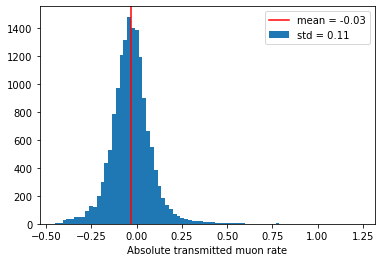

In [23]:
relat_diff = (transmission-free_sky)/free_sky

mean = relat_diff.ravel().mean()
std = relat_diff.ravel().std()

fig,ax =plt.subplots()
ax.hist(relat_diff.ravel(),bins=80,label='std = {:.2f}'.format(std))
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Absolute transmitted muon rate")
ax.legend()
plt.show()

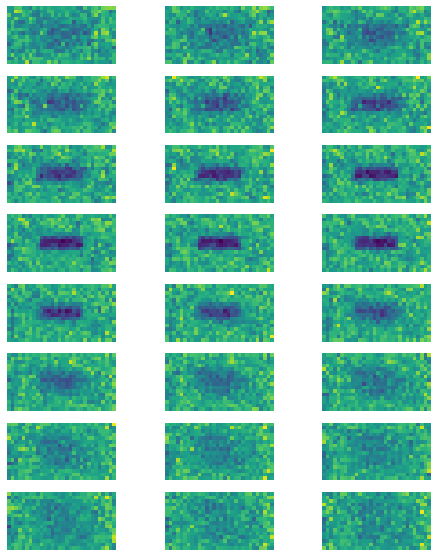

In [24]:
fig,ax = plt.subplots(nrows=int(len(relat_diff[0,0,:])/3),ncols=3,figsize=(8,10))
ax = ax.ravel()
for i in range(len(relat_diff[0,0,:])):
    imshow_transmission_rate(relat_diff[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)

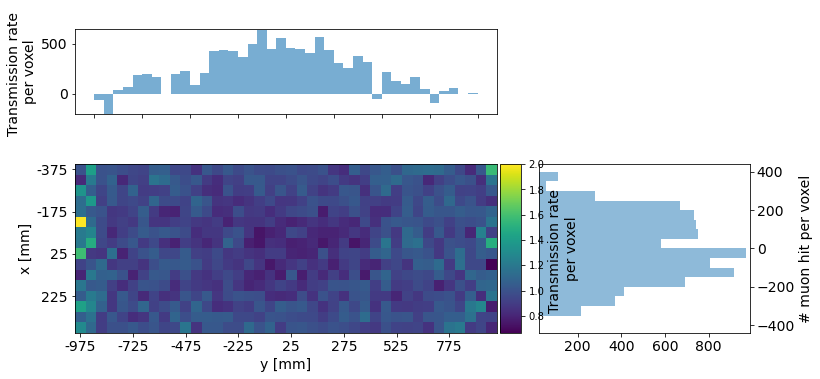

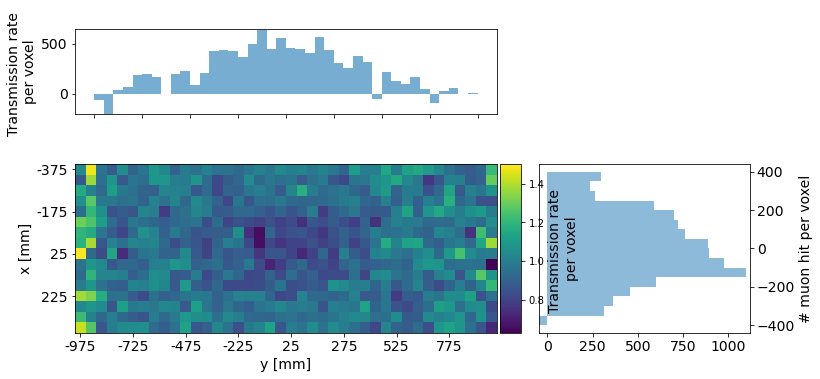

In [89]:
final_scores = diff

from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,1135],dimension=[800,2000,1200],voxel_width=50)

# for i in range(VOI.n_vox_xyz[2]):
for i in range(2):

# XY view
    fig,main_ax = plt.subplots(figsize=(8, 8))

    imshow_transmission_rate(ratio[:,:,i],fig=fig,main_ax=main_ax,VOI=VOI)

    # X view
    x_hist = main_ax.inset_axes([0, 1.3, 1, .5], transform=main_ax.transAxes)  
    bin_height = final_scores[:,:,1].sum(dim=0).numpy()
    bin_center = VOI.voxel_centers[0,:,0,1].numpy()
    x_hist.set_ylim(min(bin_height),max(bin_height)+max(bin_height)/50)
    x_hist.bar(bin_center,bin_height,width=(VOI.vox_width),alpha=.6)
    x_hist.set_ylabel('Transmission rate \nper voxel',fontsize=14)
#     x_hist.set_xlabel('Voxel $x$ position [mm]',fontsize=14)
    # Ticks
    x_hist.xaxis.set_tick_params(labelbottom=False)
    x_hist.xaxis.set_tick_params(labeltop=False)
    
    # x_hist.set_tick_params(labelleft=False)
    x_hist.tick_params(axis='x', labelsize=14)
    x_hist.tick_params(axis='y', labelsize=14)

    # # Y view
    y_hist = main_ax.inset_axes([1.1, 0, .5, 1], transform=main_ax.transAxes)

    bin_height = final_scores[:,:,i].sum(dim=1).numpy()
    bin_center = VOI.voxel_centers[:,0,0,0].numpy()
    y_hist.set_xlim(min(bin_height),max(bin_height)+max(bin_height)/50)
    y_hist.barh(bin_center,bin_height,height=VOI.vox_width,alpha=.5)
    y_hist.set_ylabel('# muon hit per voxel',fontsize=14)

    y_hist.yaxis.set_label_position("right")
    y_hist.yaxis.tick_right()
    y_hist.tick_params(axis='x', labelsize=14)
    y_hist.tick_params(axis='y', labelsize=14)



    plt.show()